# Linear Regression: Features and Labels

# 1. Introduction to Linear Regression

A fundamental algorithm in supervised Machine Learning is <em>Linear Regression</em>.  At a high level, the idea of linear regression is to find a <em>best-fit line</em>, that is as close to as much of the data as possible.  Recall that the algebraic equation of a line is: $y=mx+b$.  The idea of linear regression then is to determine the best values for $m$ and $b$, so that you can pass in any input value $x$, in order to recieve an output value *y*.  Note that in practice, there are often more coefficients than only $m$ and $b$.

An example of when one may use linear regression is with stock prices.  By passing in some values from one day, one can predict the stock price at a future date.  This input value could be anything from the close price on a given day, to the high price, or the daily open-close percent change, or more.

See Figure 1 for an illustration of a <em>best-fit line</em> for given data points.

<center><img src="Images/Regression Line.png" alt="Regression Line"></center>
Figure 1: Image source: [1]

# 2. General Setup

In [1]:
# Import analytics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import quandl, the library for importing financial data, and getpass to hide API
import quandl
from getpass import getpass

In [2]:
# Raise errors instead of give warnings
pd.set_option('mode.chained_assignment', 'raise')

# 3. Import Stock Data

In [3]:
# Define the variable stock_symbol here — the stock we want to use for this project
stock_symbol = 'GOOGL'

# Define API key
api_key = getpass()

# Use quandl to get stock data
stocks_raw = quandl.get(f'WIKI/{stock_symbol}', authtoken=api_key)

# Preview stock data
display(stocks_raw.head())

········


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


## 3.1 Features and Labels

A fundamental concept in supervised machine learning is that of features and labels.  <b>Features</b> are descriptive attributes, while <b>labels</b> are the known values of whatever you want to predict in the future.  The <b>target variable</b> is an unknown value you want to predict.$^{2}$  An example of a target variable may be future close stock prices.  By taking labels (e.g. past prices you already know) and features (e.g. the high for a given day, the low, the volume, etc) you can train a machine learning classifier to take those same features, and predict the target variable.

In order to accurately predict that target variable, we must identify the most meaningful features.  Not every data point in a dataset is meaningful with respect to predicting a label.  Often, using more features than necessary confuses the model and potentially yields biased results.  We will therefore examine our data and select the most meaningful points to serve as features.  After previewing your data, a good first step is to understand the properties of the dataset as a whole: Does your dataset have missing values?  What is the average of numerical columns?  How many distinct values exist in non-numerical columns?  If I expect a value to grow over time, does it grow?

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03,3424.000000,3424.0,3424.000000,3424.000000,3424.000000,3424.000000,3.424000e+03
mean,596.602610,602.045438,590.571710,596.352862,7.818568e+06,0.165880,1.0,409.221461,412.786556,405.227809,409.057885,7.818568e+06
std,226.989782,227.783310,225.846581,226.896692,8.248211e+06,9.706436,0.0,257.844081,259.366718,255.981628,257.773495,8.248211e+06
min,99.090000,101.740000,95.960000,100.010000,5.211410e+05,0.000000,1.0,49.698414,51.027517,48.128568,50.159839,5.211410e+05
25%,461.157500,465.392500,456.065000,461.205000,2.430647e+06,0.000000,1.0,231.292728,233.416785,228.738594,231.316552,2.430647e+06
50%,565.120000,569.599950,559.860000,564.940000,5.076200e+06,0.000000,1.0,300.174109,302.496277,297.909618,300.264387,5.076200e+06
75%,735.627500,740.850000,728.680025,733.262500,1.020910e+07,0.000000,1.0,561.178118,565.000000,556.673036,561.200000,1.020910e+07
max,1226.800000,1228.880000,1218.600000,1220.170000,8.215110e+07,567.971668,1.0,1188.000000,1198.000000,1184.060000,1187.560000,8.215110e+07


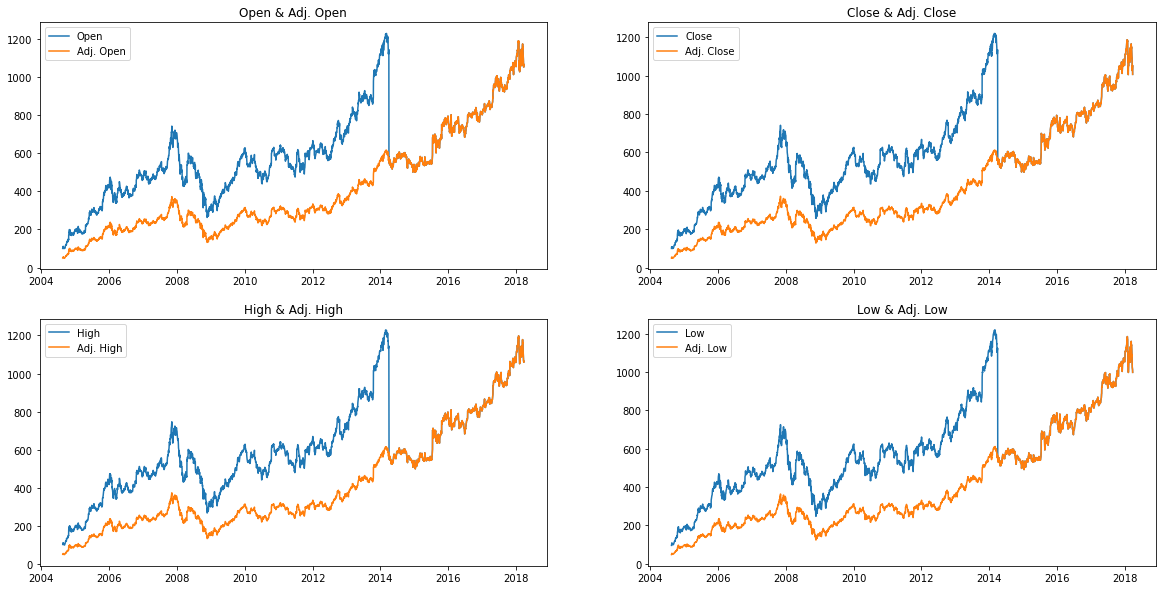

Figure 2.


In [4]:
# Check for missing values
print(stocks_raw.isna().sum())
display(stocks_raw.describe())

# Plot data points
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.plot(stocks_raw['Open'], label='Open')
plt.plot(stocks_raw['Adj. Open'], label='Adj. Open')
plt.legend()
plt.title('Open & Adj. Open')

plt.subplot(2,2,2)
plt.plot(stocks_raw['Close'], label='Close')
plt.plot(stocks_raw['Adj. Close'], label='Adj. Close')
plt.legend()
plt.title('Close & Adj. Close')

plt.subplot(2,2,3)
plt.plot(stocks_raw['High'], label='High')
plt.plot(stocks_raw['Adj. High'], label='Adj. High')
plt.legend()
plt.title('High & Adj. High')

plt.subplot(2,2,4)
plt.plot(stocks_raw['Low'], label='Low')
plt.plot(stocks_raw['Adj. Low'], label='Adj. Low')
plt.legend()
plt.title('Low & Adj. Low')
plt.show()

print("Figure 2.")

We have examined our dataset, and are in a better place to pick meaningful features.  In Figure 2, we confirmed that there are no missing values in the dataset, and that all open, high, low, and close prices have generally risen over time, in line with what we would expect with stock data.  We are now in a good place to confidently pick out features.

In this case, we don't need both regular prices as well as adjusted prices.  Furthermore, we see a sharp drop in regular prices, which we do not see reflected in adjusted prices.  Without doing further analysis, we will assume this drop could be due to something as simple as a stock split.  Therefore we proceed with only adjusted prices, to mitigate the chance of such sharp drops confusing the machine learning model.

In [5]:
# Create new dataframe with only relevant data
stocks_adjusted = stocks_raw[['Adj. Open', \
                          'Adj. Close', \
                          'Adj. High', \
                          'Adj. Low', \
                          'Adj. Volume']].copy()

# Preview new dataframe with only relevant data
display(stocks_adjusted.head())

,Adj. Open,Adj. Close,Adj. High,Adj. Low,Adj. Volume
Date,,,,,
2004-08-19,50.159839,50.322842,52.191109,48.128568,44659000.0
2004-08-20,50.661387,54.322689,54.708881,50.405597,22834300.0
2004-08-23,55.551482,54.869377,56.915693,54.693835,18256100.0
2004-08-24,55.792225,52.597363,55.972783,51.945350,15247300.0
2004-08-25,52.542193,53.164113,54.167209,52.100830,9188600.0


At this point we will note that we are not limited to exactly which datapoints our raw dataset has.  In this case, our target variable is the future adjusted close price, so that we can predict what price the stock will close at in the future.  When determining our features, rather than examining the exact data points we have right now, we ask ourselves what data would be meaningful in general to predict adjusted close prices.  One answer may be the daily open-close percent change; another may be the daily high-low volatility.  We will therefore create these columns ourselves.

In [6]:
# Calculuate daily percent change and make new column therefrom
stocks_adjusted['Open-Close Percent Change'] = \
                                     ((stocks_adjusted['Adj. Close'] - stocks_adjusted['Adj. Open']) \
                                      / stocks_adjusted['Adj. Open'] ) * 100

# Calculate high-low volatility percent and make new column therefrom
stocks_adjusted['High-Low Percent Change'] = \
                                            ((stocks_adjusted['Adj. High'] - stocks_adjusted['Adj. Low']) \
                                            / stocks_adjusted['Adj. Low']) * 100

display(stocks_adjusted.head())

,Adj. Open,Adj. Close,Adj. High,Adj. Low,Adj. Volume,Open-Close Percent Change,High-Low Percent Change
Date,,,,,,,
2004-08-19,50.159839,50.322842,52.191109,48.128568,44659000.0,0.324968,8.441017
2004-08-20,50.661387,54.322689,54.708881,50.405597,22834300.0,7.227007,8.537313
2004-08-23,55.551482,54.869377,56.915693,54.693835,18256100.0,-1.227880,4.062357
2004-08-24,55.792225,52.597363,55.972783,51.945350,15247300.0,-5.726357,7.753210
2004-08-25,52.542193,53.164113,54.167209,52.100830,9188600.0,1.183658,3.966115


We have defined two new features, Open-Close Percent Change, and High-Low Percent Change.  Given that the latter was calculated from the Adj. High and Adj. Low prices, these two points are no longer necessary, and we will drop them both.  Similarly, because of how we defined Open-Close percent change, we no longer need the Adj. Open price; we will keep the Adj. Close column however, as this is what we want to predict.

In [7]:
# Select feature columns
stocks = stocks_adjusted[['Adj. Close'
                          ,'Open-Close Percent Change'
                          ,'High-Low Percent Change'
                          ,'Adj. Volume']].copy()

# Preview dataframe now with more meaningful columns
display(stocks.head())

,Adj. Close,Open-Close Percent Change,High-Low Percent Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,0.324968,8.441017,44659000.0
2004-08-20,54.322689,7.227007,8.537313,22834300.0
2004-08-23,54.869377,-1.227880,4.062357,18256100.0
2004-08-24,52.597363,-5.726357,7.753210,15247300.0
2004-08-25,53.164113,1.183658,3.966115,9188600.0


At this point we need to determine our label.  In our case, it will be the adjusted close price, <em>at some point in the future.</em>  In other words, we want to forecast the future price.  We are not limited however to forecasting the price on only one day; we can forecast out a number of days.  In our case, we will forecast out 5% of the length of our dataframe.

In [8]:
# Define the number of days out we want to forecast out
# In this case, want to forecast out 5% of the dataframe
# We will use the math ceil() function to round the number of columns to the nearest whole number.
import math
forecast_out = math.ceil(0.05*len(stocks))
print(len(stocks['Adj. Close']))
print(forecast_out)

3424
172


In [9]:
# We define the label here — the Adj. Close price
forecast_column = 'Adj. Close'

# Add labels- forecast column
stocks['Forecast'] = stocks[forecast_column].shift(-forecast_out)

# Preview dataframe
display(stocks.head())

,Adj. Close,Open-Close Percent Change,High-Low Percent Change,Adj. Volume,Forecast
Date,,,,,
2004-08-19,50.322842,0.324968,8.441017,44659000.0,109.713676
2004-08-20,54.322689,7.227007,8.537313,22834300.0,110.230270
2004-08-23,54.869377,-1.227880,4.062357,18256100.0,110.064759
2004-08-24,52.597363,-5.726357,7.753210,15247300.0,110.340611
2004-08-25,53.164113,1.183658,3.966115,9188600.0,111.489156


## 3.2 Shifting

At this point we will formally define the Forecast field as our label, making our features the Adj. Close field, the Open-Close Percent Change, the High-Low Percent Change, and the Adj. Volume; remember that the label is not the Adj. Close price, because our target variable is the price <em>at some point in the future</em>, or the <em>forecast</em>.

We created our label by shifting Adj. Close prices.

Using the .shift() method with a positive number causes each value to move down to the next row. 

Using the .shift() method with a negative number causes each value to move up to the previous row.

Observe the example in Figure 3.  When shifting the Adj. Close price in a positive direction, the value of 50.32 on 2014-08-19 moved down the dataframe to the date 2004-08-24.  When shifting the Adj. Close price in a negative direction, the value of 1006.94 on 2018-03-27 moved up the dataframe to the date 2018-03-23.

In [10]:
# Create copy of dataframe
stocks_label_shift = stocks.copy()

# Shift forecast column in positive direction (rows go down)
stocks_label_shift['shift_positive_3'] = \
  stocks_label_shift[forecast_column].shift(3)

# Shift forecast column in negative direction (rows go up)
stocks_label_shift['shift_negative_2'] = \
  stocks_label_shift[forecast_column].shift(-2)

display(stocks_label_shift[[forecast_column, 'shift_positive_3', 'shift_negative_2']].head(5))
display(stocks_label_shift[[forecast_column, 'shift_positive_3', 'shift_negative_2']].tail(5))
display('Figure 3.')

,Adj. Close,shift_positive_3,shift_negative_2
Date,,,
2004-08-19,50.322842,NaN,54.869377
2004-08-20,54.322689,NaN,52.597363
2004-08-23,54.869377,NaN,53.164113
2004-08-24,52.597363,50.322842,54.122070
2004-08-25,53.164113,54.322689,53.239345


,Adj. Close,shift_positive_3,shift_negative_2
Date,,,
2018-03-21,1094.00,1134.42,1026.55
2018-03-22,1053.15,1100.07,1054.09
2018-03-23,1026.55,1095.80,1006.94
2018-03-26,1054.09,1094.00,NaN
2018-03-27,1006.94,1053.15,NaN


'Figure 3.'

By shifting each field $x$ days in a negative direction—where $x$ is 5% of the length of the dataframe—the value that was in row $a$, is now in row $b$, where $b = a - x$.  In other words, row $a$ is some date, and row $b$ is some time before that date.  This will make the label of each row the price $x$ days into the future.  In Figure 3, observe the row dated 2018-03-21; the adjusted close price on this date was 1094.00, and the same price 2 days later (or 2 rows later) was 1026.55.  This "future price" of 1026.55 is the label for the row dated 2018-03-21.

This is why the Adj. Close <em>value</em> can almost be thought of as both a feature and a label.  Do note though that the column itself named Adj. Close is only a feature, and that the label is the Forecast column.  The forecast column copied values from the Adj. Close column, and placed them with different dates.

In our case, we forecasted out 5% of our known data; 5% of the total number of days (3,424 days) is 172 days.  Thus each field in the Forecast column is what the stock price was 172 days into the future.  For the first $x-172$ number of rows, (where $x$ is the length of the dataframe—3,424 rows), we already know this value.  The final 172 rows are our target variable.  Observe Figure 4.

In [11]:
display(stocks[[forecast_column, 'Forecast']].head())
display(stocks[[forecast_column, 'Forecast']].tail())
display('Figure 4.')

,Adj. Close,Forecast
Date,,
2004-08-19,50.322842,109.713676
2004-08-20,54.322689,110.230270
2004-08-23,54.869377,110.064759
2004-08-24,52.597363,110.340611
2004-08-25,53.164113,111.489156


,Adj. Close,Forecast
Date,,
2018-03-21,1094.00,NaN
2018-03-22,1053.15,NaN
2018-03-23,1026.55,NaN
2018-03-26,1054.09,NaN
2018-03-27,1006.94,NaN


'Figure 4.'

## 3.3 Bringing it all together

As we stated, the target variable for this project is the Adj. Close price <i>at some point in the future</i>; we have named this "Forecast."

Examine the first row in Figure 5—with a date of 2004-08-19.  Our features are:
<ul>
    <li>an Adj. Close price of 50.32</li>
    <li>an Open-Close Percent Change of 0.32</li>
    <li>a High-Low Percent Change of 8.44</li>
    <li>an Adj. Volume of 44659000</li>
</ul>

The label for this row is 109.71.

Therefore, on any given day, given a close price of 50.32, if the open-close percent change were 0.32, and the high-low percent change were 8.44, and the adjusted volume were 44659000, then we can expect the adjusted close price in 172 days to be 109.71.  We will not discuss the math at this time, but know that we can define an algebraic expression to model this exact scenario.  Using the data points from the second row, we can tweak our algebraic expression, and while a single expression is not guaranteed to model both rows perfectly, it can be close to both.  This same logic is repeated for the third row, and then every row thereafter; 3,000 rows later, we will have an algebraic expression that we can pass features into, and it will output the predicted adjusted close price on that day.

In [12]:
display(stocks.head())
display(stocks.tail())
display('Figure 5.')

,Adj. Close,Open-Close Percent Change,High-Low Percent Change,Adj. Volume,Forecast
Date,,,,,
2004-08-19,50.322842,0.324968,8.441017,44659000.0,109.713676
2004-08-20,54.322689,7.227007,8.537313,22834300.0,110.230270
2004-08-23,54.869377,-1.227880,4.062357,18256100.0,110.064759
2004-08-24,52.597363,-5.726357,7.753210,15247300.0,110.340611
2004-08-25,53.164113,1.183658,3.966115,9188600.0,111.489156


,Adj. Close,Open-Close Percent Change,High-Low Percent Change,Adj. Volume,Forecast
Date,,,,,
2018-03-21,1094.00,0.130884,1.976619,1990515.0,NaN
2018-03-22,1053.15,-2.487014,3.265882,3418154.0,NaN
2018-03-23,1026.55,-2.360729,4.089299,2413517.0,NaN
2018-03-26,1054.09,0.332191,4.818025,3272409.0,NaN
2018-03-27,1006.94,-5.353887,6.707965,2940957.0,NaN


'Figure 5.'

To limit each notebook to a particular topic, we will export our current dataframe (including all features) as a csv, and move on to the next step in a new notebook.

In [13]:
# Define export file path
import os
export_file_path = os.path.join('data', 'stocks.csv')

# Export stock_data as a csv
stocks.to_csv(export_file_path, index=True, header=True)

# Sources:
1. <a href="https://pythonprogramming.net/regression-introduction-machine-learning-tutorial/" target="_blank">Python Programming: Regression - Intro and Data</a>
2. <a href="https://pythonprogramming.net/features-labels-machine-learning-tutorial/" target="_blank">Python Programming: Regression - Features and Labels</a>